# Algorithm Included:

**Machine Learning Algorithm:**

* Supervised:
    1. Linear Regression
    2. Logistic Regression
    3. Decision Tree(CART)
    4. Random Forest
    4. Naive Bayes
    5. SVM(Linear)
    6. KNN


* UnSupervrised
   1. K-Means
   2. Principal Component Analysis
   3. Apriori Algorithm


* Deep Learning
  1. Neural Network 


* Searching Algorithm
  1. BFS
  2. DFS

# Supervised

# 1. Linear Regression

**In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression.**

MSE: 305.7719958301902


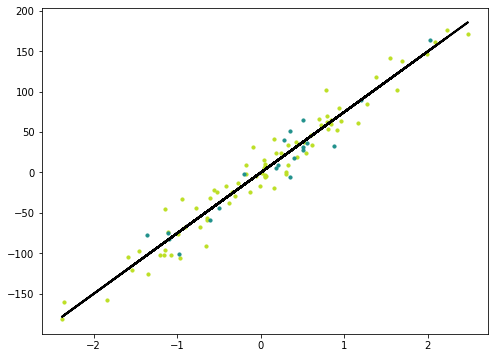

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class LinearRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
 

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)



X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
    
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

y_pred_line = regressor.predict(X)



cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="Prediction")
plt.show()



# 2. Logistic Regression

**Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression**

In [2]:
class logisticRegression:

  def __init__(self,lr=0.001,n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self,X,y):
    #init parameters
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    #gradient descent
    for _ in range(self.n_iters):
      linear_model = np.dot(X,self.weights) + self.bias
      y_predicted = self._sigmoid(linear_model)

      dw = (1/n_samples) * np.dot(X.T,(y_predicted-y))
      db = (1/n_samples) * np.sum(y_predicted-y)

      self.weights -= self.lr *dw
      self.bias -= self.lr * db 

  def predict(self,X):
    linear_model = np.dot(X,self.weights) + self.bias
    y_predicted = self._sigmoid(linear_model)
    y_predicted_cls = [1 if i>0.5 else 0 for i in y_predicted]
    return y_predicted_cls
  
  def _sigmoid(self,x):
    return(1/(1+np.exp(-x)))

#Test Logistic regression in breast_cancer
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)



def accuracy(y_true,y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)
  return accuracy

regressor = logisticRegression(lr=0.0001,n_iters=1000)
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

print("Accuracy: ",accuracy(y_test, predictions))

Accuracy:  0.9298245614035088


# 3. Decision Tree(CART)

**A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).**

In [3]:
from collections import Counter

def entropy(y):
  hist = np.bincount(y)
  ps = hist/len(y)
  return(-np.sum([p * np.log2(p) for p in ps if p>0]))



class Node:
  def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value
  
  def is_leaf_node(self):
    return(self.value is not None)


class DecisionTree:
  def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    self.n_feats = n_feats
    self.root = None

  def fit(self, X, y):
    self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
    self.root = self._grow_tree(X, y)

  def _grow_tree(self, X, y, depth=0):
    n_samples, n_features = X.shape
    n_labels = len(np.unique(y))

    #stopping criteria
    if(depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
      leaf_value = self._most_common_label(y)
      return(Node(value=leaf_value))
    
    feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

    #greedy search
    best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

    left_idxs, right_idxs = self._split(X[:,best_feat],best_thresh)

    left = self._grow_tree(X[left_idxs,:], y[left_idxs], depth+1)
    right = self._grow_tree(X[right_idxs,:], y[right_idxs], depth+1)
    return(Node(best_feat, best_thresh, left, right))
  

  def _best_criteria(self, X, y, feat_idxs):
    best_gain = -1
    split_idx, split_thresh = None, None
    for feat_idx in feat_idxs:
      X_column = X[:, feat_idx]
      thresholds = np.unique(X_column)
      for threshold in thresholds:
        gain = self._information_gain(y, X_column, threshold)
        if(gain>best_gain):
          best_gain = gain
          split_idx = feat_idx
          split_thresh = threshold
    return(split_idx, split_thresh)

  def _information_gain(self, y, X_column, split_threh):
    #parent entropy
    parent_entropy = entropy(y)

    #generate split
    left_idxs, right_idxs = self._split(X_column, split_threh)
    if(len(left_idxs == 0) or len(right_idxs)==0):
      return 0

    #weighted avg vhild entropy
    n = len(y)
    n_l, n_r = len(left_idxs), len(right_idxs)
    e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
    child_entropy = (n_l/n)*e_l + (n_r/n)*e_r

    #return ig
    ig = parent_entropy - child_entropy

    return ig
  
  def _split(self, X_column, split_threh):
    left_idxs = np.argwhere(X_column <= split_threh).flatten()
    right_idxs = np.argwhere(X_column > split_threh).flatten()
    return(left_idxs, right_idxs)
  
  def predict(self, X):
    #traverse tree
    return(np.array([self._traverse_tree(x, self.root) for x in X]))

  def _traverse_tree(self, x, node):
    if(node.is_leaf_node()):
      return(node.value)

    if(x[node.feature] <= node.threshold):
      return(self._traverse_tree(x, node.left))
    return(self._traverse_tree(x, node.right))

  def _most_common_label(self, y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return(most_common)

#decision tree test


def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return(accuracy)



data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)



clf = DecisionTree(max_depth=20)
clf.fit(X_train, y_train)



y_pred = clf.predict(X_test)
acc = accuracy(y_test, y_pred)

print("Accuracy: ",acc)

Accuracy:  0.6228070175438597


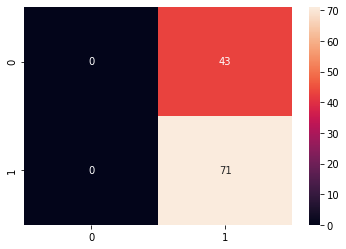

In [4]:
cnf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)

# 4. Random Forest

**Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.Random decision forests correct for decision trees' habit of overfitting to their training set.**

In [5]:
def bootstrap_sample(X, y):
  n_samples = X.shape[0]
  idxs = np.random.choice(n_samples, size = n_samples, replace=True)
  return(X[idxs], y[idxs])

def most_common_label(y):
  counter = Counter(y)
  most_common = counter.most_common(1)[0][0]
  return(most_common)

class RandomForest:
  def __init__(self, n_trees = 100, min_samples_split=2, max_depth=100, n_feats=None):
    self.n_trees = n_trees
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    self.n_feats = n_feats
    self.trees = []

  def fit(self, X, y):
    self.trees = []
    for _ in range(self.n_trees):
      tree = DecisionTree(min_samples_split = self.min_samples_split, max_depth=self.max_depth, n_feats=self.n_feats)
      X_sample, y_sample = bootstrap_sample(X, y)
      tree.fit(X_sample, y_sample)
      self.trees.append(tree)
  def predict(self, X):
    tree_preds = np.array([tree.predict(X) for tree in self.trees])
    tree_preds = np.swapaxes(tree_preds, 0, 1)

    y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
    return np.array(y_pred)


clf_f = RandomForest(n_trees=3)
clf_f.fit(X_train, y_train)

y_pred = clf_f.predict(X_test)
acc = accuracy(y_test, y_pred)

print("Accuracy: ",acc)

Accuracy:  0.6929824561403509


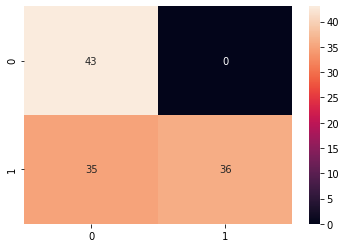

In [6]:
cnf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)

# 5. Naive Bayes

**In machine learning, naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. They are among the simplest Bayesian network models.But they could be coupled with Kernel density estimation and achieve higher accuracy levels.**

In [7]:
class NaiveBayes:

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self._classes = np.unique(y)
    n_classes = len(self._classes)

    #init mean, var, priors
    self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
    self._var = np.zeros((n_classes, n_features), dtype=np.float64)
    self._priors = np.zeros(n_classes, dtype=np.float64)

    for c in self._classes:
      X_c = X[c==y]
      self._mean[c,:]=X_c.mean(axis=0)
      self._var[c,:]=X_c.var(axis=0)
      self._priors[c] = X_c.shape[0] / float(n_samples)

  def predict(self,X):
    y_pred = [self._predict(x) for x in X]
    return(y_pred)
    
  def _predict(self, x):
    posteriors = []
    for idx, c in enumerate(self._classes):
      #print(idx,c)
      prior = np.log(self._priors[idx])
      class_conditional = np.sum(np.log(self._pdf(idx,x)))
      posterior = prior + class_conditional
      posteriors.append(posterior)
    return(self._classes[np.argmax(posteriors)])


    
  def _pdf(self, class_idx, x):
    mean = self._mean[class_idx]
    var = self._var[class_idx]
    numerator = np.exp(-(x-mean)**2/(2 * var))
    denominator = np.sqrt(2*np.pi*var)
    return(numerator/denominator)


# Naive Bayes Test


def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)
  return(accuracy)

X,y = datasets.make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

print("Naive Bayes classification accuracy ",accuracy(y_test, predictions))

Naive Bayes classification accuracy  0.965


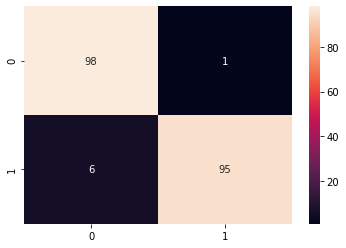

In [8]:
cnf_matrix = confusion_matrix(y_test, predictions)
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)

# 6. SVM(Linear)

**In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall. **

[-0.20334488  0.34762713 -0.05190083] -1.0459999999999956


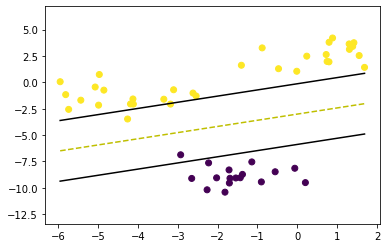

In [9]:
class SVM:
  def __init__(self, learning_rate = 0.001, lambda_param=0.01, n_iters=1000):
    self.lr = learning_rate
    self.lambda_param = lambda_param
    self.n_iters = n_iters
    self.w = None
    self.b = None

  def fit(self, X, y):
    y_ = np.where(y<=0,-1,1)
    n_samples, n_features = X.shape

    self.w = np.zeros(n_features)
    self.b = 0

    for _ in range(self.n_iters):
      for idx, x_i in enumerate(X):
        condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >=1
        if condition:
          self.w -= self.lr * (2*self.lambda_param * self.w)
        else:
          self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
          self.b -= self.lr * y_[idx]
  
  def predict(self, X):
    linear_output = np.dot(X, self.w) - self.b
    return(np.sign(linear_output))

X, y =  datasets.make_blobs(n_samples=50, n_features=3, centers=3, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

clf = SVM()
clf.fit(X, y)
predictions = clf.predict(X)
 
print(clf.w, clf.b)

def visualize_svm():
     def get_hyperplane_value(x, w, b, offset):
          return (-w[0] * x + b + offset) / w[1]

     fig = plt.figure()
     ax = fig.add_subplot(1,1,1)
     plt.scatter(X[:,0], X[:,1], marker='o',c=y)

     x0_1 = np.amin(X[:,0])
     x0_2 = np.amax(X[:,0])

     x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
     x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

     x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
     x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

     x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
     x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

     ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
     ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
     ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

     x1_min = np.amin(X[:,1])
     x1_max = np.amax(X[:,1])
     ax.set_ylim([x1_min-3,x1_max+3])

     plt.show()

visualize_svm()

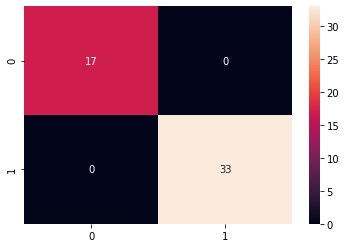

In [10]:
cnf_matrix = confusion_matrix(y, predictions)
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)

# 7. KNN

**In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression: **

In [11]:
#KNN Algortihm: Iris Dataset

import csv
with open(r'/kaggle/input/ml-scratch-master/ML_Scratch-master/knn/iris.data') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines:
        pass
        #print (', '.join(row))

import random
def handleDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

#compute euclidean distance
import math
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

#Find k-nearest neighbour
import operator 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors


#Predict the class
import operator
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]


#Accuracy
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

#Main Program


def main():
    #prepare data
    trainingset = []
    testset = []
    split = 0.67
    
    handleDataset('/kaggle/input/ml-scratch-master/ML_Scratch-master/knn/iris.data',split,trainingset,testset)
    
    predictions = []
    k=3
    for x in range(len(testset)):
        neighbors = getNeighbors(trainingset,testset[x],k)
        result = getResponse(neighbors)
        predictions.append(result)
        #print('prediction = '+repr(result)+' actual = '+repr(testset[x][-1]))
    
    accuracy = getAccuracy(testset,predictions)
    print('Accuracy: '+repr(accuracy)+'%')
    
main()

Accuracy: 96.22641509433963%


# Unsupervised

# 1. K Means

**k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition and observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. It is popular for cluster analysis in data mining. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, Better Euclidean solutions can be found using k-medians and k-medoids. **

3


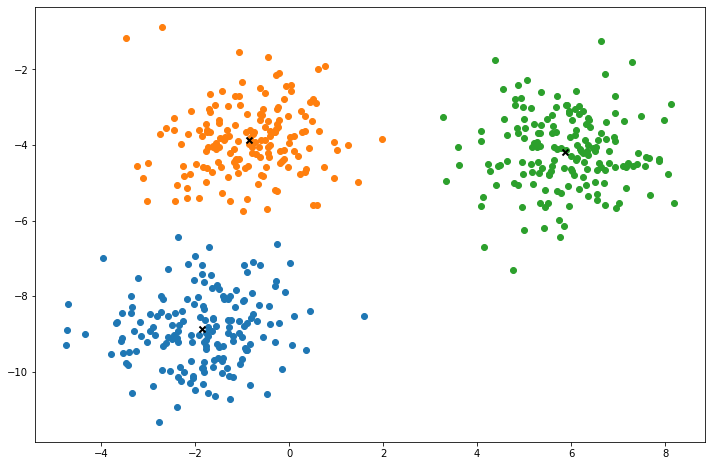

In [12]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn import datasets
import matplotlib.pyplot as plt

np.random.seed(42)

X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)

def euclidean_distance(x1,x2):
  return np.sqrt(np.sum((x1 - x2)**2))

class KMeans:
  def __init__(self, K=5, max_iters=100, plot_steps=False):
    self.K = K
    self.max_iters = max_iters
    self.plot_steps = plot_steps

    #list of samples endices for each cluster
    self.clusters = [[] for _ in range(self.K)]

    #mean feature vector for each cluster
    self.centroids = []

  def predict(self, X):
    self.X = X
    self.n_samples, self.n_features = X.shape

    #initialize centroids
    random_sample_idxs = np.random.choice(self.n_samples, self.K, replace = False)
    self.centroids = [self.X[idx] for idx in random_sample_idxs]

    #optimization
    for _ in range(self.max_iters):
      #update clusters
      self.clusters = self._create_clusters(self.centroids)
      if self.plot_steps:
        self.plot()

      #update centroids
      centroids_old = self.centroids
      self.centroids = self._get_centroids(self.clusters)


      #check if converged
      if self._is_converged(centroids_old, self.centroids):
        break

      if self.plot_steps:
        self.plot()
 
    #return cluster labels
    return self._get_cluster_labels(self.clusters)

  def _get_cluster_labels(self, clusters):
    labels = np.empty(self.n_samples)
    for cluster_idx, cluster in enumerate(clusters):
      for sample_idx in cluster:
        labels[sample_idx] = cluster_idx
    return labels


  def _create_clusters(self, centroids):
    clusters = [[] for _ in range(self.K)]
    for idx, sample in enumerate(self.X):
      centroid_idx = self._closest_centroid(sample, centroids)
      clusters[centroid_idx].append(idx)
    return clusters

  def _closest_centroid(self, sample, centroids):
    distances = [euclidean_distance(sample,point) for point in centroids]
    closest_idx = np.argmin(distances)
    return closest_idx
  
  def _get_centroids(self, clusters):
    centroids = np.zeros((self.K, self.n_features))
    for cluster_idx, cluster in enumerate(clusters):
      cluster_mean = np.mean(self.X[cluster], axis=0)
      centroids[cluster_idx] = cluster_mean
    return centroids
  
  def _is_converged(self, centroids_old, centroids):
    distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
    return sum(distances) == 0
  
  def plot(self):
    fig, ax = plt.subplots(figsize=(12,8))

    for i, index in enumerate(self.clusters):
      point = self.X[index].T
      ax.scatter(*point)
    for point in self.centroids:
      ax.scatter(*point,marker='x',color='black',linewidth=2)

    plt.show()  

clusters = len(np.unique(y))
print(clusters)
km = KMeans(K= clusters, max_iters=150, plot_steps=False)
y_pred = km.predict(X)
km.plot()

# 2. PCA

**PCA is defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.**

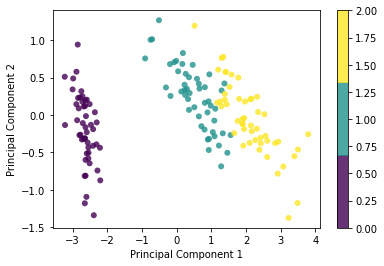

In [13]:
class PCA:
  def __init__(self, n_components):
    self.n_components = n_components
    self.components = None
    self.mean = None

  def fit(self, X):
    #mean
    self.mean = np.mean(X, axis=0)
    #1 row = sample, columns = features
    X = X - self.mean

    #covariance
    #but in documentation 1row = features, columns=samples for cov ...so we transpose our data
    cov = np.cov(X.T)

    #eigenvectors, eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(cov)

    #v[:, i]
    #sort eigenvectors
    eigenvectors = eigenvectors.T
    idxs = np.argsort(eigenvalues)[::-1]
    
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]

    #store first n eigenvectors
    self.components = eigenvectors[0:self.n_components]

  def transform(self, X):
    #project data
    X = X - self.mean
    return(np.dot(X, self.components.T))

#PCA TEST
data = datasets.load_iris()
X = data.data
y = data.target

#project data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)



x1 = X_projected[:,0]
x2 = X_projected[:,1]

plt.scatter(x1,x2,c=y,edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap('viridis',3))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# 3. Apriori Algorithm

**Introduction to APRIORI**

Apriori is an algorithm used for Association Rule Mining. It searches for a series of frequent sets of items in the datasets. It builds on associations and correlations between the itemsets. It is the algorithm behind “You may also like” where you commonly saw in recommendation platforms. What is Associate Rule Mining?

ARM( Associate Rule Mining) is one of the important techniques in data science. In ARM, the frequency of patterns and associations in the dataset is identified among the item sets then used to predict the next relevant item in the set. This ARM technique is mostly used in business decisions according to customer purchases.

Example: In Walmart, if Ashok buys Milk and Bread, the chances of him buying Butter are predicted by the Associate Rule Mining technique.

Some definitions need to be remembered

Before we start, go through some terms which are explained below.

SUPPORT_COUNT — number of transactions in which the itemset appears.

MINIMUM_SUPPORT_COUNT — the minimum frequency of itemset in the dataset.

CANDIDATE_SET — C(k) support_count of each item in the dataset.

ITEM_SET — L(k) comparing each item in the candidate_set support count to minimum_support_count and filtering the under frequent itemset.

SUPPORT — the percentage of transactions in the database follow the rule.

Support(A->B) = Support_count(A U B)

CONFIDENCE — the percentage of customers who bought A also bought B.

Confidence(A->B) = [Support_count(AUB)/Support_count(A)]*100

Steps In Apriori

Apriori algorithm is a sequence of steps to be followed to find the most frequent itemset in the given database. This data mining technique follows the join and the prune steps iteratively until the most frequent itemset is achieved. A minimum support threshold is given in the problem or it is assumed by the user.
1. In the first iteration of the algorithm, each item is taken as a 1-itemsets candidate. The algorithm will count the occurrences of each item.

2. Let there be some minimum support, min_sup ( eg 2). The set of 1 – itemsets whose occurrence is satisfying the min sup are determined. Only those candidates which count more than or equal to min_sup, are taken ahead for the next iteration and the others are pruned.

3. Next, 2-itemset frequent items with min_sup are discovered. For this in the join step, the 2-itemset is generated by forming a group of 2 by combining items with itself.

4. The 2-itemset candidates are pruned using min-sup threshold value. Now the table will have 2 –itemsets with min-sup only.

5. The next iteration will form 3 –itemsets using join and prune step. This iteration will follow antimonotone property where the subsets of 3-itemsets, that is the 2 –itemset subsets of each group fall in min_sup. If all 2-itemset subsets are frequent then the superset will be frequent otherwise it is pruned.

6. Next step will follow making 4-itemset by joining 3-itemset with itself and pruning if its subset does not meet the min_sup criteria. The algorithm is stopped when the most frequent itemset is achieved.

In [14]:
import itertools
import pandas as pd


data = pd.read_csv('../input/apriori-food/data.csv')



rowlength = len(data)
no_features = len(data.values[0])

minimum_support_count = 2

records = []
for i in range(0, rowlength):
    records.append([str(data.values[i,j]) for j in range(0, no_features)])
items = sorted([item for sublist in records for item in sublist if item != 'Nan'])

#Step-->1
def stage_1(items, minimum_support_count):
    c1 = {i:items.count(i) for i in items}
    l1= {}
    
    for key, value in c1.items():
        if(value >= minimum_support_count):
            l1[key] = value
    return c1, l1
c1, l1 = stage_1(items, minimum_support_count)



def sublist(lst1,lst2):
    return(set(lst1) <= set(lst2))

def check_subset_frequency(itemset, l, n):
    if(n>1):
        subsets = list(itertools.combinations(itemset,n))
    else:
        subsets = itemset
    for iter1 in subsets:
        if not iter1 in l:
            return False
    return True

def stage_2(l1, records, minimum_support_count):
    l1 = sorted(list(l1.keys()))
    l1 = list(itertools.combinations(l1,2))
    c2 = {}
    l2 = {}
    for iter1 in l1:
        count = 0
        for iter2 in records:
            if(sublist(iter1,iter2)):
                count += 1
        c2[iter1] = count
    for key,value in c2.items():
        if(value >= minimum_support_count):
            if(check_subset_frequency(key, l1,2)):
                l2[key] = value
    return c2, l2

c2,l2 = stage_2(l1, records, minimum_support_count)
print(c2)
print(l2)

{('A', 'B'): 1, ('A', 'C'): 2, ('B', 'C'): 1}
{('A', 'C'): 2}


# Deep Learning

# 1. Neural Network

**A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature.**

In [15]:
class NeuralNetwork():
    
    def __init__(self):
        np.random.seed(1)
        self.synaptic_weights = 2*np.random.random((3,1)) - 1
    
    def sigmoid(self,x):
        return(1/(1+np.exp(-x)))
    
    def sigmoid_derivative(self,x):
        return(x/(1+x))
    
    def train(self,training_inputs, training_outputs,training_iterations):
        for itr in range(training_iterations):
            
            output = self.think(training_inputs)
            error = training_outputs - output
            adjustments = np.dot(training_inputs.T,error*self.sigmoid_derivative(output))
            self.synaptic_weights += adjustments
    
    def think(self,inputs):
        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs,self.synaptic_weights))
        return output
    
    


#In short, use this ' if name == "main" ' block to prevent (certain) code from being run when the module
#is imported. Put simply, name is a variable defined for each script that defines whether the script is 
#being run as the main module or it is being run as an imported module.



if(__name__ == "__main__"):
    neural_network = NeuralNetwork()
    
    print("Rnadom synaptic weights: ")
    print(neural_network.synaptic_weights)
    
    training_inputs = np.array([[0,0,1],
                                [1,1,1],
                                [1,0,1],
                                [0,1,1]])
    training_outputs = np.array([[0,1,1,0]]).T
    
    neural_network.train(training_inputs,training_outputs,10000)
    
    print("Synaptic weights after training: ")
    print(neural_network.synaptic_weights)
    
    #A = str(input('Input 1: '))
    #B = str(input('Input 2: '))
    #C = str(input('Input 3: '))
    A = 0
    B = 1
    C = 1
    print("New situation: input data = ", A, B, C)
    print("Output data: ")
    print(neural_network.think(np.array([A,B,C])))

Rnadom synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Synaptic weights after training: 
[[13.38883717]
 [-0.18998542]
 [-4.49621121]]
New situation: input data =  0 1 1
Output data: 
[0.00913743]


# Searching Algorithm

# 1. BFS

**BFS is a traversing algorithm where you should start traversing from a selected node (source or starting node) and traverse the graph layerwise thus exploring the neighbour nodes (nodes which are directly connected to source node).**

In [16]:
from collections import defaultdict

class Graph:
    
    #Constructor
    def __init__(self):
        
        #deafault dictionary to store graph
        self.graph = defaultdict(list)
        
    #function to add an edge to graph
    def addEdge(self,u,v):
        self.graph[u].append(v)
            
    #Function to print a BFS of graph
    def BFS(self,s):
        #Mark all the vertices as not visited
        visited = [False]*(len(self.graph))
            
        #create a queue for BFS
        queue = []
            
        #Mark the source node as visited and enqueue it
        queue.append(s)
        visited[s] = True
            
        while queue:
            #Dequeue a vertex from queue and print it
            s = queue.pop(0)
            print(s,end=" ")
                
            #Get all adjacent vertices of the dequeued vertex s
            #If a adjacent has not been visited, then mark it visited and enqueue it
            for i in self.graph[s]:
                if visited[i]==False:
                    queue.append(i)
                    visited[i] = True

#Create a graph given in the above diagram
g = Graph()
g.addEdge(0,1)
g.addEdge(0,2)

g.addEdge(1,2)
g.addEdge(1,4)

g.addEdge(2,3)
g.addEdge(3,5)

g.addEdge(4,6)

g.addEdge(5,5)
g.addEdge(6,6)



print("breadth first search starting from vertex 's'")
g.BFS(0)

breadth first search starting from vertex 's'
0 1 2 4 3 6 5 

# 2. DFS

**Depth-first search (DFS) is an algorithm for traversing or searching tree or graph data structures. The algorithm starts at the root node (selecting some arbitrary node as the root node in the case of a graph) and explores as far as possible along each branch before backtracking. **

In [17]:
from collections import defaultdict

class Graph:
    def __init__(self):
        #default dictionary
        self.graph = defaultdict(list)
    #function to add an edge to graph
    def addEdge(self,u,v):
        self.graph[u].append(v)
        
    #function used by DFS
    def DFSUtil(self,v,visited):
        # Mark the current node as visited and print it
        visited[v] = True
        print(v,end=' ')
        
        # Recur for all the vertices
        # adjacent to this vertex
        for i in self.graph[v]:
            if visited[i] == False:
                self.DFSUtil(i,visited)
                
    # The function to do DFS traversal. It uses recursive DFSUtil()
    def DFS(self,v):
        # Mark all the vertices as not visited
        visited = [False] * (len(self.graph))
        
        #call the recursive helper function to print DFS traversal
        self.DFSUtil(v,visited)
        


# the above diagram 
g = Graph()
g.addEdge(0,1)
g.addEdge(0,2)

g.addEdge(1,2)
g.addEdge(1,4)

g.addEdge(2,3)
g.addEdge(3,5)

g.addEdge(4,6)

g.addEdge(5,5)
g.addEdge(6,6)
  
print ("Following is Depth First Traversal"
                  " (starting from vertex 2)") 
g.DFS(0)      


Following is Depth First Traversal (starting from vertex 2)
0 1 2 3 5 4 6 